<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

KernelPCA with MaxAbsScaler

This code template of KPCA(Kernel PCA) in python is a non-linear technique for dimensionality reduction through use of kernel. Kernel PCA is an extension of principal component analysis (PCA) using techniques of kernel methods. Using kernel, the original linear operations of PCA is performed in a reproducing kernel Hilbert space.

### Required Packages

In [1]:
import warnings 
import itertools
import numpy as np 
import pandas as pd 
import seaborn as se
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler
from numpy.linalg import eigh
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [4]:
#x_values
features=[]

In [8]:
#y_value
target= ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [9]:
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [10]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [11]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [12]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Rescaling
 
used sklearn.preprocessing.MaxAbsScaler

Scale each feature by its maximum absolute value.
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

Read more at [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)

In [13]:
X_Scaled=MaxAbsScaler().fit_transform(X)
X=pd.DataFrame(X_Scaled,columns=X.columns)
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,0.807779,0.381135,0.185322,0.390764,0.282921,0.205557,0.362186,0.135682,0.300625,0.380367,0.207540,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,0.581589,0.189175,0.150235,0.154595,0.136629,0.167845,0.096603,0.046970,0.253836,0.175934,0.118365,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,0.615661,0.259520,0.161085,0.208599,0.173423,0.197559,0.295864,0.096768,0.389847,0.284991,0.153184,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072


### Choosing the number of components

We have to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

This curve quantifies how much of the total, dimensional variance is contained within the first N components. 

### Explained Variance

Explained variance refers to the variance explained by each of the principal components (eigenvectors). It can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors.

The function below returns a list with the values of explained variance and also plots cumulative explained variance 

In [14]:
def explained_variance_plot(X):
    cov_matrix = np.cov(X, rowvar=False) #this function returns the co-variance matrix for the features 
    egnvalues, egnvectors = eigh(cov_matrix) #eigen decomposition is done here to fetch eigen-values and eigen-vectors
    total_egnvalues = sum(egnvalues)
    var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
    plt.plot(np.cumsum(var_exp))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    return var_exp

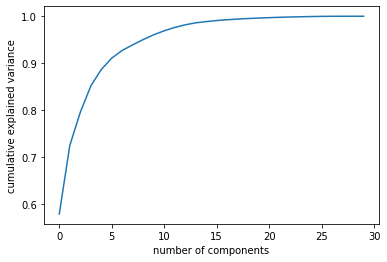

In [15]:
var_exp=explained_variance_plot(X)

#### Scree plot
The scree plot helps you to determine the optimal number of components. The eigenvalue of each component in the initial solution is plotted. Generally, you want to extract the components on the steep slope. The components on the shallow slope contribute little to the solution. 

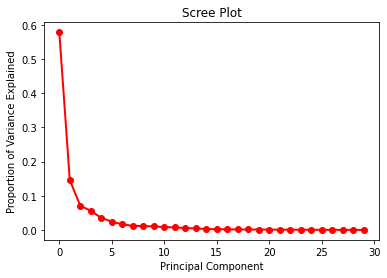

In [16]:
plt.plot(var_exp, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### Model
Kernel PCA in python is a non-linear technique for dimensionality reduction through the use of Kernel.
Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) for the parameters

In [17]:
X_embedded = KernelPCA(n_components=8,random_state=24,kernel = 'linear').fit_transform(X)

#### Output Dataframe

In [19]:
finalDf = pd.DataFrame(data = X_embedded)
finalDf.columns=['comp1','comp2','comp3','comp4','comp5','comp6','comp7','comp8']
finalDf['Y']=Y
finalDf.head()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,Y
0,1.304098,0.240650,-0.086556,-0.399412,-0.160026,0.183037,0.171501,0.105594,M
1,0.380734,-0.493857,-0.061348,-0.131333,0.037396,-0.005126,-0.024569,-0.116007,M
2,0.880140,-0.104477,-0.032571,-0.117218,-0.036618,0.025043,-0.101849,-0.082259,M
3,0.942367,1.114882,-0.221502,-0.021612,-0.348525,0.369734,0.073291,-0.113463,M
4,0.579153,-0.250451,0.147622,-0.353284,0.024527,-0.138734,-0.026158,0.033614,M


#### Creator: Ganapathi Thota , Github: [Profile](https://github.com/Shikiz)